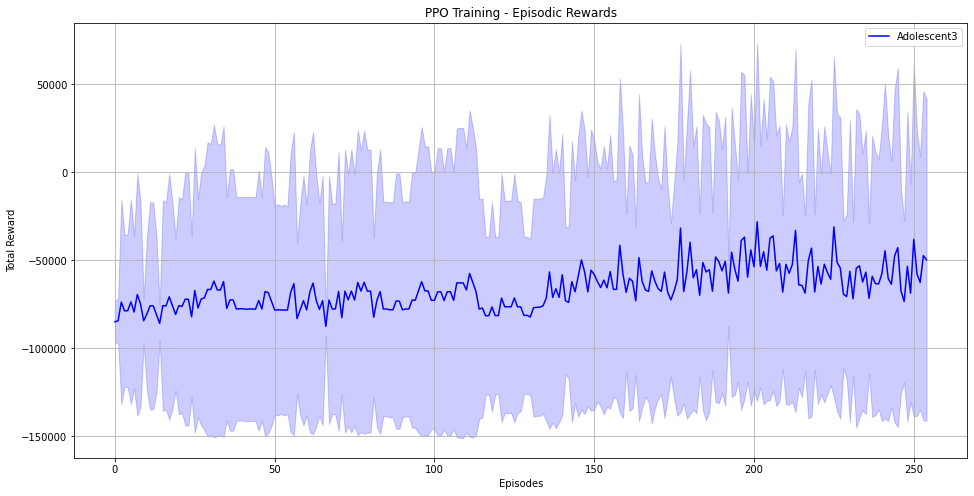

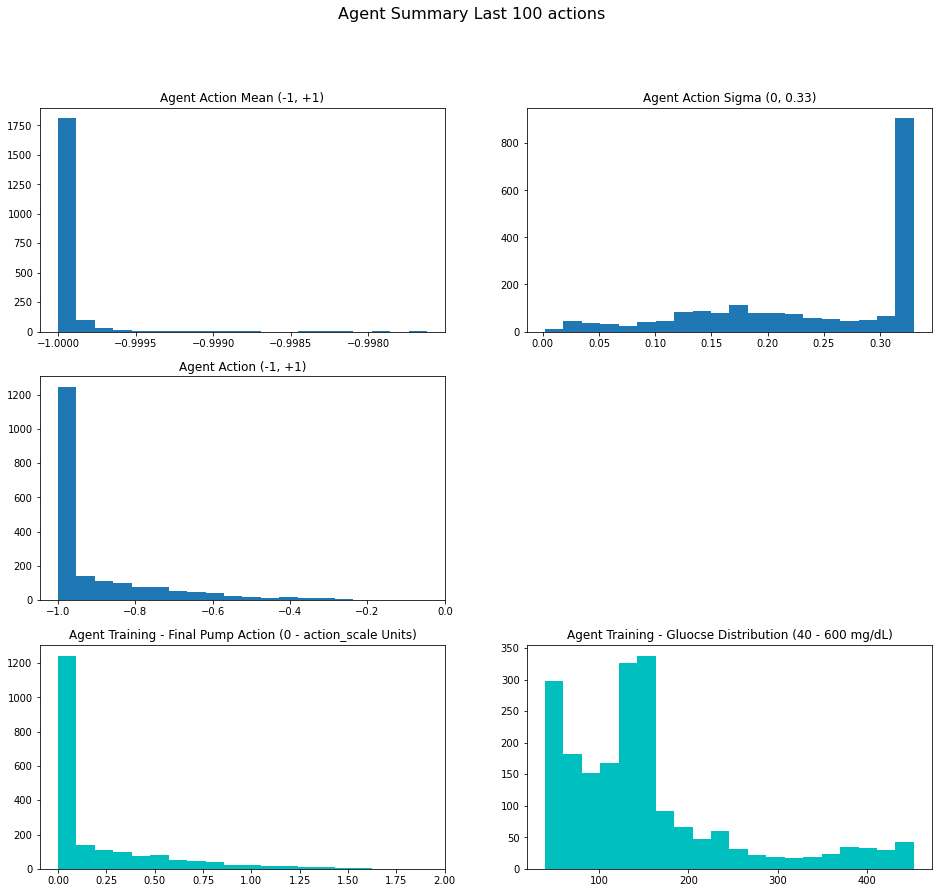

In [17]:
from core import get_avg, get_concat
from matplotlib import pyplot as plt
import matplotlib.gridspec
import numpy as np
import pandas as pd
import json
%matplotlib inline

MAIN_PATH = '../results/fully_connect_network_5/'
with open(MAIN_PATH + 'args.json') as json_file:
    args = json.load(json_file)
training_workers = args['n_training_workers']
testing_workers = args['n_testing_workers']
training_seeds = [x for x in range(0, training_workers)]
testing_seeds = [500+x for x in range(0, testing_workers)]

# Agent training rewards...
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
data = get_avg(MAIN_PATH, training_seeds, '/training/data/reward_summary_', 'reward')
ma, mstd = data['mean'], data['std_dev']
ax.plot(ma, '-b', label="Adolescent3")
ax.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd, color="b", alpha=0.2)
ax.set_title('PPO Training - Episodic Rewards')
ax.legend(loc="upper right")
ax.set_ylabel('Total Reward')
ax.set_xlabel('Episodes')
ax.grid()
plt.show()

# Agent training debug...
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(321)
ax1 = fig.add_subplot(322)
ax1_1 = fig.add_subplot(323)
ax2 = fig.add_subplot(325)
ax3 = fig.add_subplot(326)
ax.hist(get_concat(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'mean'), bins = 20)
ax1.hist(get_concat(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'std'), bins = 20)
ax1_1.hist(get_concat(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'action'), bins = 20)
ax2.hist(get_concat(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'pump_action'), bins = 20, color = 'c')
ax3.hist(get_concat(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'glucose'), bins = 20, color = 'c')
ax.set_title('Agent Action Mean (-1, +1)')
ax1.set_title('Agent Action Sigma (0, 0.33)')
ax1_1.set_title('Agent Action (-1, +1)')
ax2.set_title('Agent Training - Final Pump Action (0 - action_scale Units)')
ax3.set_title('Agent Training - Gluocse Distribution (40 - 600 mg/dL)')
fig.suptitle('Agent Summary Last 100 actions', fontsize=16)
plt.show()

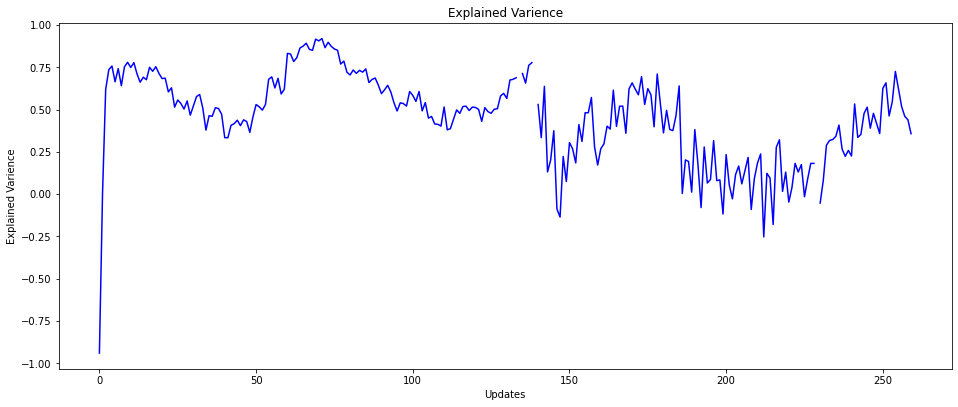

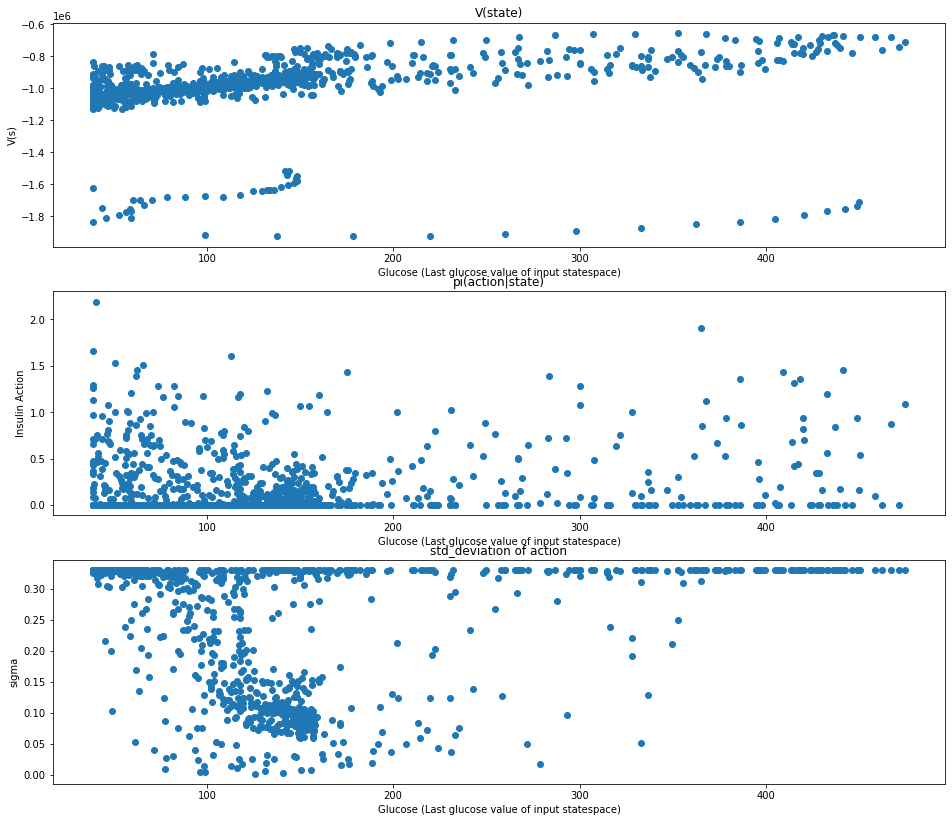

In [18]:
explained_var = pd.read_csv(MAIN_PATH + '/explained_var.csv')
fig = plt.figure(figsize=(16, 14)) 
ax = fig.add_subplot(211)  
ax.plot(explained_var, '-b', label="explained_var") 
ax.set_title('Explained Varience') 
ax.set_xlabel('Updates') 
ax.set_ylabel('Explained Varience') 
plt.show()

def get_concat_recent(path, seeds, filename, column): 
    path = path + filename 
    full_arr, refined = [], [] 
    FILES = [ path + str(seed)+'.csv' for seed in seeds] 
    for file in FILES: 
        d = pd.read_csv(file) 
        full_arr.append(d[column][-48:]) 
        data = pd.concat(full_arr, axis=0) 
    return data

fig = plt.figure(figsize=(16, 14)) 
ax0 = fig.add_subplot(311) 
ax1 = fig.add_subplot(312) 
ax2 = fig.add_subplot(313) 
data_glucose = get_concat_recent(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'glucose') 
data_state_val = get_concat_recent(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'state_value') 
data_mu = get_concat_recent(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'pump_action') 
data_std = get_concat_recent(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'std')

ax0.scatter(data_glucose, data_state_val) 
ax1.scatter(data_glucose, data_mu) 
ax2.scatter(data_glucose, data_std)

ax0.set_title('V(state)') 
ax0.set_xlabel('Glucose (Last glucose value of input statespace)') 
ax0.set_ylabel('V(s)')
ax1.set_title('pi(action|state)') 
ax1.set_xlabel('Glucose (Last glucose value of input statespace)') 
ax1.set_ylabel('Insulin Action')
ax2.set_title('std_deviation of action') 
ax2.set_xlabel('Glucose (Last glucose value of input statespace)') 
ax2.set_ylabel('sigma')

plt.show()